In [1]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
sys.path.insert(0,'..')
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("../UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

import excel with unifloc vba done. version 7.24


Импорт необходимых модулей

In [2]:
import numpy as np
from matplotlib import pylab as plt
import matplotlib as mpl

Расчет перепада давления в ЭЦН

In [3]:
## Физико-химические свойства флюида PVT
gamma_gas_ = 0.8 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.9 # удельная плотность нефти, по воде;
gamma_wat_ = 1 # удельная плотность воды, по воде;
Rsb_ = 80 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 80 # замерной газовый фактор, м3/м3;
Pb_ = 120 # давление насыщения при температуре пласта, атм;
Tres_ = 100 # пластовая температура, С;
Bob_ = 1.2 # объемный коэффициент нефти, м3/м3;
muob_ = 1 # вязкость нефти при давлении насыщения, сП;
## Параметры потока флюида
Q_ = 3 # дебит жидкости на поверхности, м3/сут;
fw_ = 10 # объемная обводненность, %;
## Данные по ЭЦН
Q_ESP_ = 80 # номинальный дебит, м3/сут;
Head_ESP_ = 2000 # номинальный напор системы УЭЦН, м;
Freq_ = 50 # частота вращения ЭЦН, Гц;
PumpID_ = UniflocVBA.ESP_id_by_rate(Q_ESP_) # идентификатор типового насоса;
print("ЭЦН ID - "+ str(PumpID_))
ESP_name = UniflocVBA.ESP_name(PumpID_) #  название ЭЦН по номеру;
print("ЭЦН имя - "+ ESP_name)
Qmax_ = UniflocVBA.ESP_rate_max_sm3day(Freq_, PumpID_) # максимальный дебит ЭЦН для заданной частоты при номинаьной кривой РНХ;
print("ЭЦН Qmax - "+ str(Qmax_))
NumStage_ = round(Head_ESP_/UniflocVBA.ESP_head_m(Q_ESP_, 1, pump_id=PumpID_)) # количество ступеней;
print("Ступени - "+ str(NumStage_))
KsepGasSep_ = 80 # коэффициент сепарации газосепаратора УЭЦН;
PKsep = 80 # давление сепарации, атм;
TKsep = 80 # температура сепарации, С;
mu = 1 # вязкость жидкости, сП;
## Настройка графика
N_ = 20
## Данные по ЭЦН
Pintake_ = 45 # давление на приеме насоса, амт;
Tintake_ = 80 # температура на примеме насоса, С;
Pdis_ = 150 # давление на выкиде насоса, амт;
Tdis_ = 80 # температура на выкиде насоса, С;
gas_degr_type_ = 1 # тип насоса по работе с газом:
# 0 - нет коррекции;
# 1 - стандартный ЭЦН (предел 25%);
# 2 - ЭЦЕН с газостабилизирующим модулем (предел 50%)
# и т.д. см. мануал;
PVTcorr = 0 # номер набора корреляций (0 - Standing и т.д. см. мануал)
PVT_str_ = UniflocVBA.PVT_encode_string(gamma_gas_, gamma_oil_, gamma_wat_, Rsb_, Rp_, Pb_, Tres_, Bob_, muob_, PVTcorr, KsepGasSep_, PKsep, TKsep)

ЭЦН ID - 1006
ЭЦН имя - ЭЦН5-80
ЭЦН Qmax - 175.0
Ступени - 333


Расчет распределения давления в насосе и распределения параметров флюида внутри насоса

In [4]:
calc_along_flow = 1 # направление расчета;
dN = 10 # количество точек для вывода значений по ступеням;
n_stage, p_list, t_list, gas_fraction_list, qmix_list = [], [], [], [], []
p_atma = UniflocVBA.ESP_p_atma(Q_, fw_, Pintake_, NumStage_, Freq_, PumpID_, PVT_str_, Tintake_, Tdis_, calc_along_flow, gas_degr_type_, dnum_stages_integrate=dN)
for i in range(N_):
    n_stage.append(p_atma[3+i][1])
    p_list.append(p_atma[3+i][3])
    t_list.append(p_atma[3+i][4])
    gas_fraction_list.append(p_atma[3+i][5])
    qmix_list.append(p_atma[3+i][6])

<function matplotlib.pyplot.show(*args, **kw)>

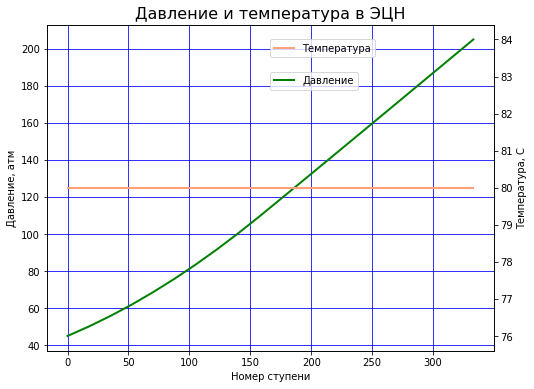

In [5]:
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

ax_01 = plt.axes()
ax_01.plot(n_stage, p_list, 'green', label='Давление', linewidth=2 )
ax_01.grid(color = 'b')
ax_01.set_xlabel(u'Номер ступени')
ax_01.set_ylabel(u'Давление, атм')
ax_02 = ax_01.twinx()
ax_02.plot(n_stage, t_list, 'lightsalmon',  label='Температура', linewidth=2 )
ax_02.set_ylabel(u'Температура, С')

ax_02.legend(loc=(0.5, 0.90))
ax_01.legend(loc=(0.5, 0.80))
ax_01.set_title("Давление и температура в ЭЦН", fontsize=16)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

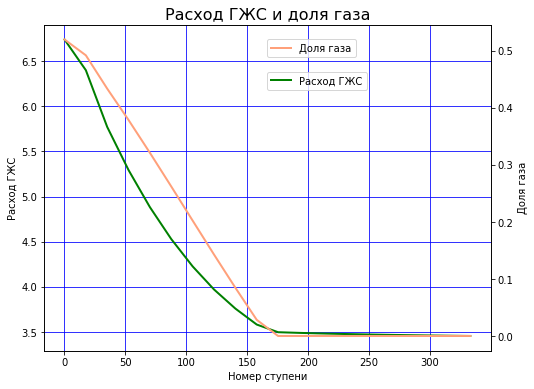

In [6]:
ax_01 = plt.axes()
ax_01.plot(n_stage, qmix_list, 'green', label='Расход ГЖС', linewidth=2 )
ax_01.grid(color = 'b')
ax_01.set_xlabel(u'Номер ступени')
ax_01.set_ylabel(u'Расход ГЖС')
ax_02 = ax_01.twinx()
ax_02.plot(n_stage, gas_fraction_list, 'lightsalmon',  label='Доля газа', linewidth=2 )
ax_02.set_ylabel(u'Доля газа')

ax_02.legend(loc=(0.5, 0.90))
ax_01.legend(loc=(0.5, 0.80))
ax_01.set_title("Расход ГЖС и доля газа", fontsize=16)
plt.show

Расчет перепада давления и параметров насоса при расчете от входа до выхода (снизу вверх)

In [7]:
dQ = Qmax_/N_ 
Q_ar = np.arange(1, Qmax_+1, dQ) #
p_dis_list, p_int_list, t_int_list, t_dis_list = [], [], [], []
for q in Q_ar:
    p_atma = UniflocVBA.ESP_p_atma(q, fw_, Pintake_, NumStage_, Freq_, PumpID_, PVT_str_, Tintake_, Tdis_, 1, gas_degr_type_, dnum_stages_integrate=dN)
    p_dis_list.append(p_atma[0][0])
    p_int_list.append(p_atma[0][1])
    t_int_list.append(p_atma[0][2])
    t_dis_list.append(p_atma[0][4])      

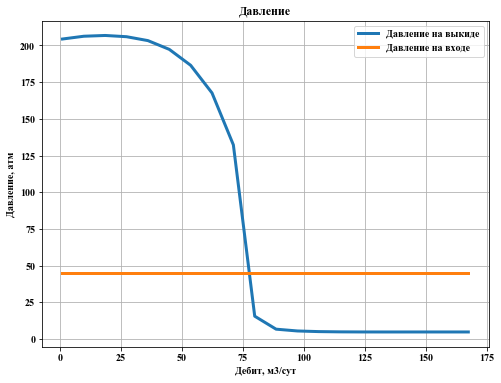

In [8]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'

ys = [p_dis_list, p_int_list]
for i in range(2):
    plt.grid(True)
    plt.title('Давление', color='black', family='fantasy')
    plt.ylabel('Давление, атм', color='black', family='fantasy')
    plt.xlabel('Дебит, м3/сут', color='black', family='fantasy')
    plt.plot(Q_ar, ys[i], linewidth=3)
plt.legend(('Давление на выкиде','Давление на входе')) 
plt.show()

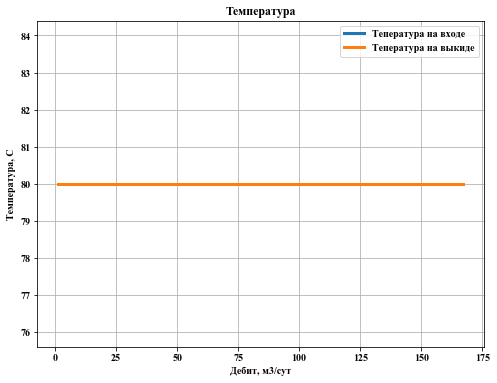

In [9]:
ys = [t_int_list, t_dis_list]
for i in range(2):
    plt.grid(True)
    plt.title('Температура', color='black', family='fantasy')
    plt.ylabel('Температура, С', color='black', family='fantasy')
    plt.xlabel('Дебит, м3/сут', color='black', family='fantasy')
    plt.plot(Q_ar, ys[i], linewidth=3)
plt.legend(('Тепература на входе','Тепература на выкиде')) 
plt.show()

Расчет перепада давления и параметров насоса при расчете от выхода до входа (сверху вниз)

In [10]:
dQ = Qmax_/N_ 
Q_ar = np.arange(1, Qmax_+1, dQ) #
p_dis_list, p_int_list, t_int_list, t_dis_list = [], [], [], []
for q in Q_ar:
    p_atma = UniflocVBA.ESP_p_atma(q, fw_, Pdis_, NumStage_, Freq_, PumpID_, PVT_str_, Tintake_, Tdis_, 0, gas_degr_type_, dnum_stages_integrate=dN)
    p_dis_list.append(p_atma[0][3])
    p_int_list.append(p_atma[0][1])
    t_int_list.append(p_atma[0][2])
    t_dis_list.append(p_atma[0][4])      

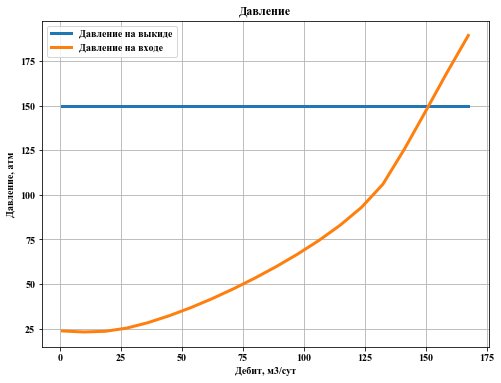

In [11]:
ys = [p_dis_list, p_int_list]
for i in range(2):
    plt.grid(True)
    plt.title('Давление', color='black', family='fantasy')
    plt.ylabel('Давление, атм', color='black', family='fantasy')
    plt.xlabel('Дебит, м3/сут', color='black', family='fantasy')
    plt.plot(Q_ar, ys[i], linewidth=3)
plt.legend(('Давление на выкиде','Давление на входе')) 
plt.show()

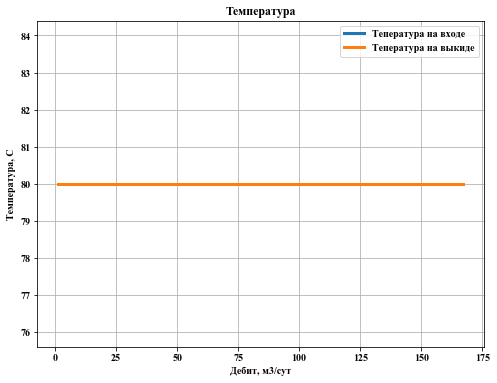

In [12]:
ys = [t_int_list, t_dis_list]
for i in range(2):
    plt.grid(True)
    plt.title('Температура', color='black', family='fantasy')
    plt.ylabel('Температура, С', color='black', family='fantasy')
    plt.xlabel('Дебит, м3/сут', color='black', family='fantasy')
    plt.plot(Q_ar, ys[i], linewidth=3)
plt.legend(('Тепература на входе','Тепература на выкиде')) 
plt.show()